# 📊 MongoDB Document Structure Analysis

This notebook explores the structural properties of the MongoDB-stored OpenFDA Adverse Event reports. It is part of the BEP project comparing a semi-structured NoSQL design (MongoDB) with a normalized relational schema (SQLite).

In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import numpy as np
import pprint

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017')  # Adjust if needed
db = client["openfda_converted"]
collection = db['full_reports']
print(f"Connected to collection with {collection.count_documents({})} documents")

Connected to collection with 35999 documents


In [9]:
def get_all_keys(d, prefix=''):
    """Recursively extract unique field paths from nested dictionaries/lists."""
    keys = set()
    if isinstance(d, dict):
        for k, v in d.items():
            full_key = f"{prefix}.{k}" if prefix else k
            keys.add(full_key)
            keys.update(get_all_keys(v, prefix=full_key))
    elif isinstance(d, list):
        for item in d:
            keys.update(get_all_keys(item, prefix=prefix))
    return keys

# Sample reports from the collection
cursor = collection.find({}, {'_id': 0})
unique_key_counts = [len(get_all_keys(doc)) for doc in cursor]





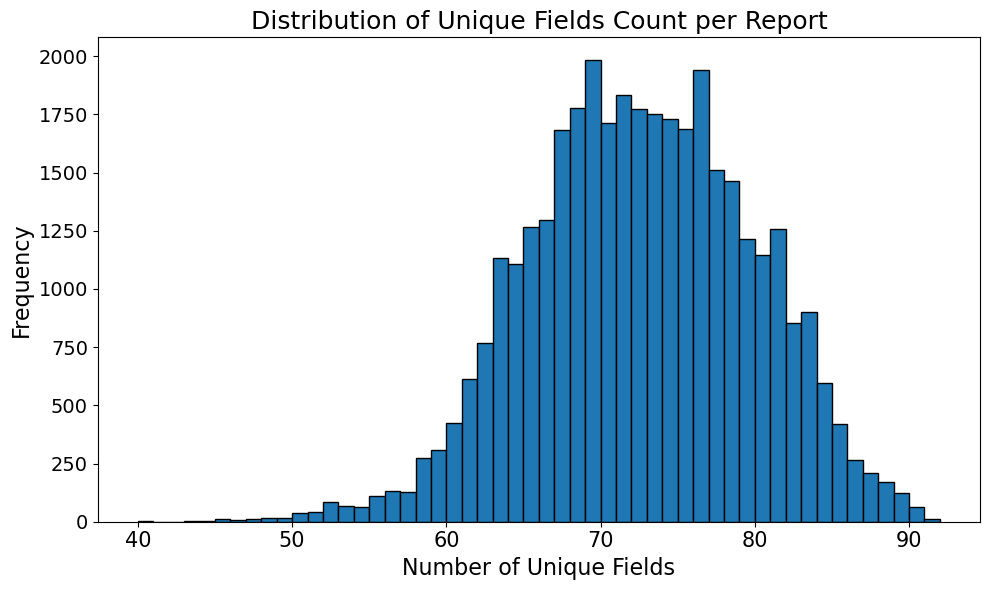

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(unique_key_counts, bins=range(min(unique_key_counts), max(unique_key_counts) + 1), edgecolor='black')
plt.title("Distribution of Unique Fields Count per Report", fontsize=18)
plt.xlabel("Number of Unique Fields", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# Step 1: Build a set of all unique report structures
unique_structures = set()

cursor = collection.find({}, {'_id': 0})
for doc in cursor:
    flattened_keys = get_all_keys(doc)
    unique_structures.add(frozenset(flattened_keys))  # frozenset allows hashing

# Step 2: Report the result
print(f"🔍 Total unique document structures: {len(unique_structures)}")

🔍 Total unique document structures: 16652
